# Improving Boston Housing Decisions with Better Safety Information
---

## Problem Definition

For many domestic and international students moving to Boston, the choice of which neighborhood to live in is often difficult and involves variables other than price and convenience. Neighborhood safety is particularly hard to judge for those coming to the city for the first time. Crime statistics are readily available, but the economic and social factors associated with crime are numerous and their relative importance is difficult to determine. Moreover, students new to Boston may be interested in a more detailed safety analysis, being concerned about certain types of crimes more than others. **Our goal is to build a model that predicts the likelihood of a general or specific crime occurring in any Boston neighborhood as a function of that neighborhood's economic, social, and infrastructural attributes.**

## Data Sources

* Boston Police Department Crime Incident Reports
  * Kaggle Link: https://www.kaggle.com/AnalyzeBoston/crimes-in-boston
  * Original Source: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system
* U.S. Census Decennial Data; BPDA Research Division; 2015-2019 American Community Survey
  * Original Source: https://data.boston.gov/dataset/neighborhood-demographics/resource/d8c23c6a-b868-4ba4-8a3b-b9615a21be07


## Data Dictionary

Below is a collection of dictionaries that provides an overview and field definitions for the primary/master dataset used in this analysis.

### crimes_with_neigborhoods.csv

**Overview**: this dataset records all crimes responded to by the Boston Police Department over a period ranging from 2015-2019, along with their exact times of occurrence, exact locations, offense descriptions, and official designations of the Boston neighborhood each crime occurred in.

* **Unnamed Field**: residual row index from a previous analysis.
* **incident_number**: unique identifier for a crime incident responded to by the BDP.
* **offense_code**: numeric code representing the BPD system's classification of the crime type.
* **offense_code_group**: BPD system's classification of the crime type.
* **offense_description**: specific description of the crime incident.
* **district**: BPD district code for reporting.
* **reporting_area**: BPD sub-district report area code.
* **shooting**: whether or not the crime involved a shooting (1 if yes, 0 if no).
* **occurred_on_date**: date and time the crime occurred.
* **year**: year of the crime incident date.
* **month**: month of the crime incident date.
* **day_of_week**: day of the week on which the crime occurred.
* **hour**: hour of the day on which the crime occurred.
* **ucr_part**: Universal Crime Reporting Part number.
* **street**: name of street the crime occurred on.
* **lat**: latitude of the crime location.
* **long**: longitude of the crime location.
* **Neighborhood**: neighborhood of Boston that the crime location belongs to.

## Importing necessary modules

For this EDA, we'll need Pandas to support our data storage, cleaning, and other preparation operations. We'll also need Matplotlib and Seaborn to support any useful visualizations. Lastly, we're also importing Numpy as a backup in case any of our data operations result in a dependency there.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets

Here, we are loading the primary datasets to be used in this analysis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crimes_w_neighborhoods = pd.read_csv('/content/drive/Shareddrives/IS833_Project/crimes_with_neighborhoods.csv', parse_dates=True)
crime_rates_by_neighborhood = pd.read_csv('/content/drive/Shareddrives/IS833_Project/crime_rates_by_neighborhood.csv')
population = pd.read_csv('/content/drive/Shareddrives/IS833_Project/population.csv')

# Initial Data Cleaning

In [ ]:
crimes_w_neighborhoods.head()

,Unnamed: 0,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,Neighborhood
0,0,I192006902,1402,Vandalism,VANDALISM,C11,364.0,0,2019-01-25 22:30:00,2019,1,Friday,22,Part Two,CENTRE ST,42.295064,-71.056725,Dorchester
1,1,I192006833,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,794.0,0,2019-01-25 12:41:00,2019,1,Friday,12,Part One,GLENVILLE AVE,42.349780,-71.134230,Allston
2,2,I192006763,619,Larceny,LARCENY ALL OTHERS,C11,333.0,0,2019-01-09 11:14:00,2019,1,Wednesday,11,Part One,MOUNT EVERETT ST,42.310136,-71.070293,Dorchester
3,4,I192006619,619,Larceny,LARCENY ALL OTHERS,B2,280.0,0,2019-01-25 17:53:00,2019,1,Friday,17,Part One,DUDLEY ST,42.328632,-71.083099,Roxbury
4,5,I192006543,2629,Harassment,HARASSMENT,B2,181.0,0,2019-01-25 13:00:00,2019,1,Friday,13,Part Two,DUDLEY ST,42.324355,-71.074403,Roxbury


In [ ]:
crimes_w_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169577 entries, 0 to 169576
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           169577 non-null  int64  
 1   incident_number      169577 non-null  object 
 2   offense_code         169577 non-null  int64  
 3   offense_code_group   169577 non-null  object 
 4   offense_description  169577 non-null  object 
 5   district             168906 non-null  object 
 6   reporting_area       168240 non-null  float64
 7   shooting             169577 non-null  object 
 8   occurred_on_date     169577 non-null  object 
 9   year                 169577 non-null  int64  
 10  month                169577 non-null  int64  
 11  day_of_week          169577 non-null  object 
 12  hour                 169577 non-null  int64  
 13  ucr_part             169484 non-null  object 
 14  street               168702 non-null  object 
 15  lat              

In [ ]:
crime_rates_by_neighborhood.head()

,Unnamed: 0,population,count,Crime rate,murder_and_nonnegligent_manslaughter,aggravated_assault,robbery,arson,auto_theft,larceny,burglary,violent_crimes,property_crimes,murder_rate,aggravated_assault_rate,robbery_rate,arson_rate,auto_theft_rate,larceny_rate,burglary_rate,violent_crime_rate,property_crime_rate
0,Allston,22312,4697.0,5812.239053,0.0,189.0,104.0,4.0,145.0,1237.0,461.0,293.0,1847.0,0.000000,233.875491,128.693392,4.949746,179.428287,1530.708901,570.458208,362.568883,2285.545142
1,Back Bay,16622,8965.0,14891.156408,0.0,198.0,151.0,4.0,198.0,5069.0,318.0,349.0,5589.0,0.000000,328.884436,250.815908,6.644130,328.884436,8419.773768,528.208337,579.700344,9283.510671
2,Beacon Hill,9023,1399.0,4280.831823,0.0,14.0,21.0,1.0,44.0,594.0,71.0,35.0,710.0,0.000000,42.838917,64.258376,3.059923,134.636598,1817.594069,217.254510,107.097294,2172.545099
3,Brighton,52685,5300.0,2777.475870,3.0,150.0,72.0,3.0,151.0,1265.0,477.0,225.0,1896.0,1.572156,78.607808,37.731748,1.572156,79.131860,662.925844,249.972828,117.911711,993.602688
4,Charlestown,16439,3025.0,5080.557756,1.0,126.0,90.0,3.0,100.0,743.0,120.0,217.0,966.0,1.679523,211.619926,151.157090,5.038570,167.952323,1247.885756,201.542787,364.456540,1622.419436


In [ ]:
crime_rates_by_neighborhood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            23 non-null     object 
 1   population                            23 non-null     int64  
 2   count                                 23 non-null     float64
 3   Crime rate                            23 non-null     float64
 4   murder_and_nonnegligent_manslaughter  23 non-null     float64
 5   aggravated_assault                    23 non-null     float64
 6   robbery                               23 non-null     float64
 7   arson                                 23 non-null     float64
 8   auto_theft                            23 non-null     float64
 9   larceny                               23 non-null     float64
 10  burglary                              23 non-null     float64
 11  violent_crimes       

In [ ]:
population.head()

,Unnamed: 0,population
0,Allston,22312
1,Back Bay,16622
2,Beacon Hill,9023
3,Brighton,52685
4,Charlestown,16439


In [ ]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  23 non-null     object
 1   population  23 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 496.0+ bytes


From visual inspection, we can see a few issues:

* crimes_w_neighborhoods
  * The first column is an unlabeled field containing a redundant index. We can drop this column.
  * In crimes_w_neighborhoods, the `Neighborhood` column is capitalized while the others are not. We can rename this column to lowercase to make it consistent with the others.
  * The `offense_code` field has been read in as integers, but these are categorical codes that make more sense as strings. We can cast these to strings.
  * The `reporting_area` field has been read in as floats, but these are categorical codes that make more sense as strings. We can cast these to strings.
  * The `occurred_on_date` field contains both date and time, but the time is probably not necessary here given that we have the hour of day in a separate field. We can extract the date component and overwrite this field with it.
  * There appear to be some missing values in several columns of the dataset.
* crime_rates_by_neighborhood
  * The first column, containing neighborhood names, is unlabeled. We will rename this column to `neighborhood`.
* population
  * The first column, containing neighborhood names, is unlabeled. We will rename this column to `neighborhood`.

We can attempt to handle the missing values in crimes_w_neighborhoods first.

In [ ]:
crimes_w_neighborhoods.isnull().sum()

Unnamed: 0                0
incident_number           0
offense_code              0
offense_code_group        0
offense_description       0
district                671
reporting_area         1337
shooting                  0
occurred_on_date          0
year                      0
month                     0
day_of_week               0
hour                      0
ucr_part                 93
street                  875
lat                       0
long                      0
Neighborhood            497
dtype: int64

Even if the missing values in each column appear in completely independent sets of rows, they would still only make up 3,473 / 169577 = 2.05% of the data. Because the fraction of rows affected by the missing values is small, we can safely drop them.

In [ ]:
crimes_w_neighborhoods.dropna(inplace=True)

In [ ]:
crimes_w_neighborhoods.drop('Unnamed: 0', axis=1, inplace=True)
crimes_w_neighborhoods.rename({'Neighborhood': 'neighborhood'}, axis=1, inplace=True)
crimes_w_neighborhoods['offense_code'] = crimes_w_neighborhoods['offense_code'].astype(str)
crimes_w_neighborhoods['reporting_area'] = crimes_w_neighborhoods['reporting_area'].astype(int).astype(str)
crimes_w_neighborhoods['occurred_on_date'] = pd.to_datetime(crimes_w_neighborhoods['occurred_on_date']).dt.date

In [ ]:
crimes_w_neighborhoods.head()

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,neighborhood
0,I192006902,1402,Vandalism,VANDALISM,C11,364,0,2019-01-25,2019,1,Friday,22,Part Two,CENTRE ST,42.295064,-71.056725,Dorchester
1,I192006833,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,794,0,2019-01-25,2019,1,Friday,12,Part One,GLENVILLE AVE,42.349780,-71.134230,Allston
2,I192006763,619,Larceny,LARCENY ALL OTHERS,C11,333,0,2019-01-09,2019,1,Wednesday,11,Part One,MOUNT EVERETT ST,42.310136,-71.070293,Dorchester
3,I192006619,619,Larceny,LARCENY ALL OTHERS,B2,280,0,2019-01-25,2019,1,Friday,17,Part One,DUDLEY ST,42.328632,-71.083099,Roxbury
4,I192006543,2629,Harassment,HARASSMENT,B2,181,0,2019-01-25,2019,1,Friday,13,Part Two,DUDLEY ST,42.324355,-71.074403,Roxbury


In [ ]:
crimes_w_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 169576
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   incident_number      167980 non-null  object 
 1   offense_code         167980 non-null  object 
 2   offense_code_group   167980 non-null  object 
 3   offense_description  167980 non-null  object 
 4   district             167980 non-null  object 
 5   reporting_area       167980 non-null  object 
 6   shooting             167980 non-null  object 
 7   occurred_on_date     167980 non-null  object 
 8   year                 167980 non-null  int64  
 9   month                167980 non-null  int64  
 10  day_of_week          167980 non-null  object 
 11  hour                 167980 non-null  int64  
 12  ucr_part             167980 non-null  object 
 13  street               167980 non-null  object 
 14  lat                  167980 non-null  float64
 15  long             

Moving on to the remaining `crime_rates_by_neighborhood` and `population` datasets:

In [ ]:
crime_rates_by_neighborhood.rename({'Unnamed: 0': 'neighborhood'}, axis=1, inplace=True)
population.rename({'Unnamed: 0': 'neighborhood'}, axis=1, inplace=True)

In [ ]:
crime_rates_by_neighborhood.head()

,neighborhood,population,count,Crime rate,murder_and_nonnegligent_manslaughter,aggravated_assault,robbery,arson,auto_theft,larceny,burglary,violent_crimes,property_crimes,murder_rate,aggravated_assault_rate,robbery_rate,arson_rate,auto_theft_rate,larceny_rate,burglary_rate,violent_crime_rate,property_crime_rate
0,Allston,22312,4697.0,5812.239053,0.0,189.0,104.0,4.0,145.0,1237.0,461.0,293.0,1847.0,0.000000,233.875491,128.693392,4.949746,179.428287,1530.708901,570.458208,362.568883,2285.545142
1,Back Bay,16622,8965.0,14891.156408,0.0,198.0,151.0,4.0,198.0,5069.0,318.0,349.0,5589.0,0.000000,328.884436,250.815908,6.644130,328.884436,8419.773768,528.208337,579.700344,9283.510671
2,Beacon Hill,9023,1399.0,4280.831823,0.0,14.0,21.0,1.0,44.0,594.0,71.0,35.0,710.0,0.000000,42.838917,64.258376,3.059923,134.636598,1817.594069,217.254510,107.097294,2172.545099
3,Brighton,52685,5300.0,2777.475870,3.0,150.0,72.0,3.0,151.0,1265.0,477.0,225.0,1896.0,1.572156,78.607808,37.731748,1.572156,79.131860,662.925844,249.972828,117.911711,993.602688
4,Charlestown,16439,3025.0,5080.557756,1.0,126.0,90.0,3.0,100.0,743.0,120.0,217.0,966.0,1.679523,211.619926,151.157090,5.038570,167.952323,1247.885756,201.542787,364.456540,1622.419436


In [ ]:
population.head()

,neighborhood,population
0,Allston,22312
1,Back Bay,16622
2,Beacon Hill,9023
3,Brighton,52685
4,Charlestown,16439


Now, we'll import and inspect the remaining supplemental socioeconomic datasets we plan to use to support our analysis.

In [ ]:
vehicles = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_vehicles_data.csv')
vehicles.head()

,neighborhood,pct_no_vehicle,pct_1_vehicle,pct_2_vehicles,pct_3_plus_vehicles
0,Allston,0.509807,0.318878,0.130861,0.040454
1,Back Bay,0.490386,0.402075,0.097670,0.009869
2,Beacon Hill,0.509858,0.410540,0.068546,0.011056
3,Brighton,0.295489,0.410917,0.223236,0.070359
4,Charlestown,0.242087,0.530452,0.201484,0.025977


In [ ]:
vacancy = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_vacancy_data.csv')
vacancy.head()

,neighborhood,pct_vacant_units,pct_vacant_for_rent,pct_vacant_rented_unoccupied,pct_vacant_for_sale,pct_vacant_sold_unoccupied,pct_vacant_seasonal,pct_vacant_other
0,Allston,0.074589,0.427757,0.338403,0.000000,0.038023,0.076046,0.119772
1,Back Bay,0.178932,0.128385,0.078898,0.016807,0.028478,0.580766,0.166667
2,Beacon Hill,0.117274,0.105409,0.031900,0.183079,0.000000,0.560333,0.119279
3,Brighton,0.048461,0.525087,0.215398,0.053633,0.015571,0.061419,0.128893
4,Charlestown,0.042933,0.287105,0.000000,0.000000,0.080292,0.226277,0.406326


In [ ]:
school_enrollment = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_school_enrollment_data.csv')
school_enrollment.head()

,neighborhood,pct_enrolled_any_school,pct_enrolled_preschool,pct_enrolled_kindergarten_g8,pct_enrolled_g9_g12,pct_enrolled_undergraduate,pct_enrolled_graduate
0,Allston,0.556813,0.001499,0.041413,0.013492,0.592148,0.351448
1,Back Bay,0.246753,0.022727,0.115955,0.046846,0.533859,0.280612
2,Beacon Hill,0.123364,0.096522,0.293043,0.086087,0.176522,0.347826
3,Brighton,0.287827,0.015110,0.157012,0.063010,0.394329,0.370539
4,Charlestown,0.178718,0.150419,0.484749,0.115730,0.093301,0.155801


In [ ]:
relocation = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_relocation_data.csv')
relocation.head()

,neighborhood,pct_not_moved,pct_moved_within_county,pct_moved_from_diff_county,pct_moved_from_diff_state,pct_moved_from_abroad
0,Allston,0.612006,0.108524,0.065229,0.138410,0.075832
1,Back Bay,0.704966,0.110255,0.054760,0.093324,0.036695
2,Beacon Hill,0.693218,0.115900,0.063662,0.087860,0.039360
3,Brighton,0.726978,0.096074,0.091578,0.059832,0.025538
4,Charlestown,0.851966,0.078656,0.035771,0.027576,0.006031


In [ ]:
poverty = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_poverty_data.csv')
poverty.head()

,neighborhood,total_poverty_rate,poverty_rate_age_0_4,poverty_rate_age_5_17,poverty_rate_age_18_24,poverty_rate_age_25_34,poverty_rate_age_35_64,poverty_rate_age_65_plus
0,Allston,0.279264,0.576642,0.024306,0.572377,0.209288,0.067823,0.266932
1,Back Bay,0.119351,0.000000,0.021858,0.567121,0.097473,0.054369,0.114800
2,Beacon Hill,0.063726,0.000000,0.000000,0.233276,0.072595,0.032798,0.071815
3,Brighton,0.172059,0.077348,0.227355,0.360586,0.108064,0.105858,0.287307
4,Charlestown,0.144394,0.150027,0.262169,0.352490,0.058276,0.144295,0.148301


In [ ]:
labor = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_labor_data.csv')
labor.head()

,neighborhood,total_labor_force_participation,labor_force_part_age_16_19,labor_force_part_age_20_34,labor_force_part_age_35_64,labor_force_part_age_65_plus
0,Allston,0.610700,0.453921,0.617661,0.797246,0.231076
1,Back Bay,0.697897,0.470054,0.789431,0.793140,0.314895
2,Beacon Hill,0.796466,0.506024,0.954686,0.793645,0.268726
3,Brighton,0.744711,0.415094,0.855557,0.814179,0.178382
4,Charlestown,0.759938,0.359494,0.941995,0.796327,0.231405


In [ ]:
income = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_income_data.csv')
income.head()

,neighborhood,per_capita_income,median_household_income,median_family_income
0,Allston,34148.70983,58141.0,73975
1,Back Bay,110676.82060,111185.0,197348
2,Beacon Hill,100005.28610,110840.9,205960
3,Brighton,41261.37584,77624.8,92364
4,Charlestown,75338.89392,127399.6,162386


In [ ]:
housing_tenure = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_housing_tenure_data.csv')
housing_tenure.head()

,neighborhood,pct_total_units_occupied,pct_owner_occupied,pct_renter_occupied
0,Allston,0.925411,0.121974,0.878026
1,Back Bay,0.821068,0.314172,0.685828
2,Beacon Hill,0.882726,0.327068,0.672932
3,Brighton,0.951539,0.229800,0.770200
4,Charlestown,0.957067,0.469330,0.530670


In [ ]:
household_type = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_household_type_data.csv')
household_type.head()

,neighborhood,pct_married_couple_family,pct_male_no_spouse,pct_female_no_spouse,pct_householder_alone,pct_householder_not_alone
0,Allston,0.168863,0.025743,0.050107,0.372510,0.382777
1,Back Bay,0.272154,0.012005,0.043036,0.523248,0.149557
2,Beacon Hill,0.283766,0.007371,0.009766,0.506173,0.192924
3,Brighton,0.263724,0.022381,0.059785,0.342321,0.311790
4,Charlestown,0.364113,0.041803,0.093757,0.385287,0.115040


In [ ]:
group_quarters = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_group_quarters_data.csv')
group_quarters.head()

,neighborhood,pct_pop_in_group_quarters
0,Allston,0.277244
1,Back Bay,0.087780
2,Beacon Hill,0.000000
3,Brighton,0.060727
4,Charlestown,0.004123


In [ ]:
education = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_education_data.csv')
education.head()

,neighborhood,pct_less_than_high_school,pct_high_school_graduate,pct_ged,pct_some_college,pct_associates_degree,pct_bachelors_degree,pct_masters_degree_and_higher
0,Allston,0.054735,0.067197,0.006902,0.084931,0.034317,0.415836,0.336081
1,Back Bay,0.020593,0.040969,0.002248,0.050033,0.031905,0.391270,0.462983
2,Beacon Hill,0.020602,0.018042,0.002438,0.032915,0.015726,0.465074,0.445203
3,Brighton,0.067087,0.100076,0.017881,0.104641,0.033493,0.392812,0.284010
4,Charlestown,0.079103,0.121640,0.015197,0.082487,0.027407,0.330944,0.343221


In [ ]:
citizenship = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_citizenship_data.csv')
citizenship.head()

,neighborhood,pct_native_citizens,pct_naturalized_citizens,pct_non_citizens
0,Allston,0.637454,0.097243,0.265303
1,Back Bay,0.781364,0.078165,0.140471
2,Beacon Hill,0.842662,0.068304,0.089034
3,Brighton,0.733078,0.130405,0.136517
4,Charlestown,0.840020,0.090749,0.069231


In [ ]:
bedrooms = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_bedrooms_data.csv')
bedrooms.head()

,neighborhood,pct_studio_1_bed,pct_2_bed,pct_3_bed,pct_4_plus_bed
0,Allston,0.449376,0.311543,0.164492,0.074589
1,Back Bay,0.604878,0.264640,0.105421,0.025061
2,Beacon Hill,0.550098,0.283507,0.114346,0.052049
3,Brighton,0.367653,0.350340,0.198164,0.083843
4,Charlestown,0.354225,0.374700,0.195028,0.076047


In [ ]:
age = pd.read_csv('/content/drive/Shareddrives/IS833_Project/boston_age_data.csv')
age.head()

,neighborhood,median_age,pct_0_9_years,pct_10_17_years,pct_18_19_years,pct_20_34_years,pct_35_39_years,pct_60_plus_years
0,Allston,27.5,0.021235,0.017185,0.122475,0.677327,0.119776,0.042002
1,Back Bay,33.6,0.036833,0.028904,0.055109,0.417140,0.275150,0.186864
2,Beacon Hill,33.0,0.063744,0.025601,0.004146,0.468905,0.263267,0.174337
3,Brighton,30.8,0.057327,0.038067,0.026222,0.527714,0.207697,0.142973
4,Charlestown,35.7,0.149723,0.050075,0.009351,0.281699,0.343087,0.166063


Inspect visually, we noticed that the `neighborhood` field in some of the supplementary datasets contain trailing spaces. If not corrected, these will results in missing values later on when these datasets are joined into the master crime dataset. To be safe, we'll remove any leading or trailing whitespace from this field in all the supplementary datasets.

In [ ]:
crime_rates_by_neighborhood.neighborhood = crime_rates_by_neighborhood.neighborhood.str.strip()
age.neighborhood = age.neighborhood.str.strip()
income.neighborhood = income.neighborhood.str.strip()
labor.neighborhood = labor.neighborhood.str.strip()
poverty.neighborhood = poverty.neighborhood.str.strip()
education.neighborhood = education.neighborhood.str.strip()
school_enrollment.neighborhood = school_enrollment.neighborhood.str.strip()
household_type.neighborhood = household_type.neighborhood.str.strip()
housing_tenure.neighborhood = housing_tenure.neighborhood.str.strip()
bedrooms.neighborhood = bedrooms.neighborhood.str.strip()
group_quarters.neighborhood = group_quarters.neighborhood.str.strip()
vehicles.neighborhood = vehicles.neighborhood.str.strip()
relocation.neighborhood = relocation.neighborhood.str.strip()
citizenship.neighborhood = citizenship.neighborhood.str.strip()
vacancy.neighborhood = vacancy.neighborhood.str.strip()

Next, we'll iteratively join the supplementary datasets into the master crime dataset, and check for missing value at each step.

In [ ]:
master_dataset = pd.merge(crimes_w_neighborhoods, crime_rates_by_neighborhood, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 38 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, age, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 45 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, income, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 48 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, labor, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 53 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, poverty, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 60 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, education, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 67 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, school_enrollment, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 73 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, household_type, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 78 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, housing_tenure, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 81 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, bedrooms, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 85 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, group_quarters, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 86 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, vehicles, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 90 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, relocation, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 95 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, citizenship, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 98 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   incident_number                       167980 non-null  object 
 1   offense_code                          167980 non-null  object 
 2   offense_code_group                    167980 non-null  object 
 3   offense_description                   167980 non-null  object 
 4   district                              167980 non-null  object 
 5   reporting_area                        167980 non-null  object 
 6   shooting                              167980 non-null  object 
 7   occurred_on_date                      167980 non-null  object 
 8   year                                  167980 non-null  int64  
 9   month                                 167980 non-null  int64  
 10  day_of_week                           167980 non-null  object 
 11  

In [ ]:
master_dataset = pd.merge(master_dataset, vacancy, how='left', on='neighborhood')
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Columns: 105 entries, incident_number to pct_vacant_other
dtypes: float64(88), int64(5), object(12)
memory usage: 135.8+ MB


In [ ]:
master_dataset.rename({'Crime rate': 'crime_rate',
                       'murder_and_nonnegligent_manslaughter': 'murder'}, axis=1, inplace=True)

We were unable to validate what the rates already present in the crime_rates_by_neighborhood dataset actually represent (they don't match the per-capita crime rates inferred by dividing the crime counts by the neighborhood population, and we can't confirm whether they represent crime incidence over some uniform period of time). As a result, we'll drop these rate columns, as well as some other variables that do not have predictive power or have too many distinct classes to be practical in a model. Additionally, we'll do some further cleaning by ensuring that dates have a proper datetime type and that continuous numeric variables are represented as floats.

In [ ]:
master_dataset.drop(['incident_number', 'offense_code', 'offense_description', 'district', 'reporting_area', 'ucr_part', 'street', 
                     'crime_rate', 'murder_rate', 'aggravated_assault_rate', 'robbery_rate', 'arson_rate', 'auto_theft_rate', 'larceny_rate',
                     'burglary_rate', 'violent_crime_rate', 'property_crime_rate'], axis=1, inplace=True)

In [ ]:
master_dataset.shooting = master_dataset.shooting.replace('Y', 1).astype(int)

In [ ]:
master_dataset.occurred_on_date = pd.to_datetime(master_dataset.occurred_on_date)
master_dataset.population = master_dataset.population.astype(float)
master_dataset.median_family_income = master_dataset.median_family_income.astype(float)

In [ ]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 88 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   offense_code_group               167980 non-null  object        
 1   shooting                         167980 non-null  int64         
 2   occurred_on_date                 167980 non-null  datetime64[ns]
 3   year                             167980 non-null  int64         
 4   month                            167980 non-null  int64         
 5   day_of_week                      167980 non-null  object        
 6   hour                             167980 non-null  int64         
 7   lat                              167980 non-null  float64       
 8   long                             167980 non-null  float64       
 9   neighborhood                     167980 non-null  object        
 10  population                       167980 non-

Recalculating per-capita crime rates over the full observation period based on crime counts and population:

In [ ]:
#master_dataset['total_crimes'] = (master_dataset.murder + master_dataset.aggravated_assault + master_dataset.robbery + master_dataset.arson + master_dataset.auto_theft +
#                                  master_dataset.larceny + master_dataset.burglary + master_dataset.violent_crimes + master_dataset.property_crimes)
master_dataset.rename({'count': 'total_crimes'}, axis=1, inplace=True)
master_dataset['crime_per_capita'] = master_dataset.total_crimes / master_dataset.population
master_dataset['murder_per_capita'] = master_dataset.murder / master_dataset.population
master_dataset['aggravated_assault_per_capita'] = master_dataset.aggravated_assault / master_dataset.population
master_dataset['robbery_per_capita'] = master_dataset.robbery / master_dataset.population
master_dataset['arson_per_capita'] = master_dataset.arson / master_dataset.population
master_dataset['auto_theft_per_capita'] = master_dataset.auto_theft / master_dataset.population
master_dataset['larceny_per_capita'] = master_dataset.larceny / master_dataset.population
master_dataset['burglary_per_capita'] = master_dataset.burglary / master_dataset.population
master_dataset['violent_crimes_per_capita'] = master_dataset.violent_crimes / master_dataset.population
master_dataset['property_crimes_per_capita'] = master_dataset.property_crimes / master_dataset.population

In [ ]:
master_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167980 entries, 0 to 167979
Data columns (total 98 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   offense_code_group               167980 non-null  object        
 1   shooting                         167980 non-null  int64         
 2   occurred_on_date                 167980 non-null  datetime64[ns]
 3   year                             167980 non-null  int64         
 4   month                            167980 non-null  int64         
 5   day_of_week                      167980 non-null  object        
 6   hour                             167980 non-null  int64         
 7   lat                              167980 non-null  float64       
 8   long                             167980 non-null  float64       
 9   neighborhood                     167980 non-null  object        
 10  population                       167980 non-

In [ ]:
for i in master_dataset.offense_code_group.unique():
  print(i)

Vandalism
Residential Burglary
Larceny
Harassment
Violations
Fraud
Drug Violation
Aggravated Assault
Other
Larceny From Motor Vehicle
Commercial Burglary
Simple Assault
Disorderly Conduct
Restraining Order Violations
Evading Fare
Recovered Stolen Property
Counterfeiting
Auto Theft
Robbery
Fire Related Reports
Liquor Violation
Confidence Games
Other Burglary
Firearm Violations
Ballistics
Offenses Against Child / Family
Homicide
Arson
Prisoner Related Incidents
Auto Theft Recovery
Operating Under the Influence
Prostitution
Bomb Hoax
Embezzlement
Phone Call Complaints
Criminal Harassment
License Plate Related Incidents
Missing Person Reported
Explosives
Gambling
Manslaughter
Biological Threat
Burglary - No Property Taken


In [ ]:
for i in master_dataset.neighborhood.unique():
  print(i)

Dorchester
Allston
Roxbury
East Boston
Roslindale
Mattapan
Back Bay
Hyde Park
Jamaica Plain
Downtown
South Boston
Longwood
Brighton
Charlestown
South Boston Waterfront
South End
West Roxbury
Mission Hill
Fenway
West End
North End
Beacon Hill


# Descriptive Statistics

We'll now take a look at some descriptive statistics for the numerical fields in our master dataset.

In [ ]:
master_dataset.describe()

,shooting,year,month,hour,lat,long,population,total_crimes,murder,aggravated_assault,robbery,arson,auto_theft,larceny,burglary,violent_crimes,property_crimes,median_age,pct_0_9_years,pct_10_17_years,pct_18_19_years,pct_20_34_years,pct_35_39_years,pct_60_plus_years,per_capita_income,median_household_income,median_family_income,total_labor_force_participation,labor_force_part_age_16_19,labor_force_part_age_20_34,labor_force_part_age_35_64,labor_force_part_age_65_plus,total_poverty_rate,poverty_rate_age_0_4,poverty_rate_age_5_17,poverty_rate_age_18_24,poverty_rate_age_25_34,poverty_rate_age_35_64,poverty_rate_age_65_plus,pct_less_than_high_school,...,pct_female_no_spouse,pct_householder_alone,pct_householder_not_alone,pct_total_units_occupied,pct_owner_occupied,pct_renter_occupied,pct_studio_1_bed,pct_2_bed,pct_3_bed,pct_4_plus_bed,pct_pop_in_group_quarters,pct_no_vehicle,pct_1_vehicle,pct_2_vehicles,pct_3_plus_vehicles,pct_not_moved,pct_moved_within_county,pct_moved_from_diff_county,pct_moved_from_diff_state,pct_moved_from_abroad,pct_native_citizens,pct_naturalized_citizens,pct_non_citizens,pct_vacant_units,pct_vacant_for_rent,pct_vacant_rented_unoccupied,pct_vacant_for_sale,pct_vacant_sold_unoccupied,pct_vacant_seasonal,pct_vacant_other,crime_per_capita,murder_per_capita,aggravated_assault_per_capita,robbery_per_capita,arson_per_capita,auto_theft_per_capita,larceny_per_capita,burglary_per_capita,violent_crimes_per_capita,property_crimes_per_capita
count,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,...,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000,167980.000000
mean,0.006739,2016.669508,6.878271,13.206066,42.323826,-71.081993,50503.512180,17591.303572,31.282819,975.853405,529.212406,9.960829,553.900012,3476.372247,774.180557,1536.348631,4814.413644,33.541620,0.092771,0.068926,0.049463,0.335975,0.288236,0.164630,46789.241671,69837.127201,90777.133385,0.684818,0.422743,0.812523,0.783738,0.198562,0.209481,0.260630,0.300085,0.354616,0.140126,0.153744,0.234381,0.141074,...,0.175022,0.365109,0.140017,0.904134,0.329458,0.670542,0.317673,0.339868,0.233343,0.109116,0.074561,0.372829,0.412544,0.168816,0.045811,0.803975,0.090514,0.041082,0.044523,0.019907,0.708883,0.145970,0.145147,0.095866,0.214277,0.136867,0.051883,0.241121,0.136549,0.219303,0.368925,0.000458,0.018533,0.010810,0.000182,0.009851,0.092989,0.014669,0.029800,0.117690
std,0.081814,1.090662,3.371415,6.306625,0.031166,0.028683,37558.809573,14118.503844,35.907335,897.680611,458.937732,9.117876,521.768506,2212.750531,652.105547,1389.393896,3255.142919,3.173446,0.035668,0.035323,0.059527,0.107573,0.059562,0.039302,26830.031617,26870.331640,44868.043282,0.059119,0.073142,0.078552,0.044331,0.039842,0.076773,0.154471,0.122261,0.162989,0.051836,0.060850,0.094500,0.067688,...,0.107653,0.088520,0.077141,0.046094,0.121435,0.121435,0.180795,0.043237,0.108141,0.059498,0.112990,0.136263,0.051627,0.077048,0.032021,0.089406,0.022981,0.019636,0.041529,0.018632,0.075550,0.043765,0.059431,0.046094,0.

Text(0.5, 1.0, 'Crime Incidents by Month')

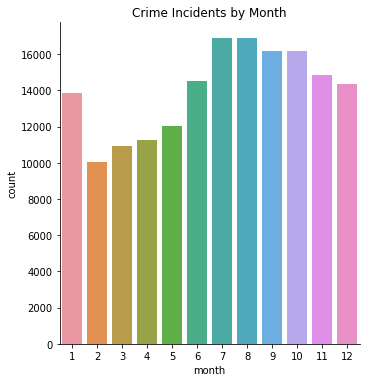

In [ ]:
sns.catplot(x='month', kind='count', data=master_dataset)
plt.title('Crime Incidents by Month')

Text(0.5, 1.0, 'Crime Incidents by Hour of Day')

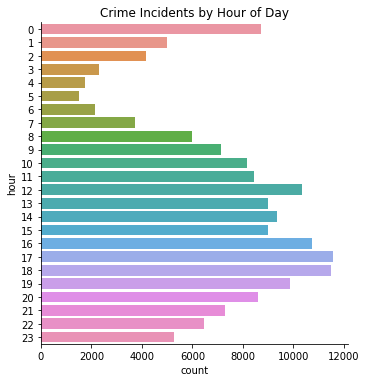

In [ ]:
sns.catplot(y='hour', kind='count', data=master_dataset)
plt.title('Crime Incidents by Hour of Day')

In [ ]:
print(f'Earliest Reported Crime Date: {crimes_w_neighborhoods.occurred_on_date.min()}')
print(f'Latest Reporting Crime Date: {crimes_w_neighborhoods.occurred_on_date.max()}')

Earliest Reported Crime Date: 2015-06-15
Latest Reporting Crime Date: 2019-01-26


The median year for crime incidents is 2017, which makes sense as it is roughly the centerpoint of the time range covered in this data. We can also see that the mean year is slightly earlier at 2016.7. At first glance, it seems that crimes tend to occur more in the later months of the year, with January being an exception. That pattern isn't intuitive, and may be a result of the endpoints of the dataset's time range (missing first half of 2015, and capturing an extra January in 2019). The fact that crime activity seems to peak around 5-6 PM is suprising, though - we might have expected the peak to come later at night. The spike at midnight is interesting as well.

In [ ]:
from pandas import DataFrame
crime_dataset = DataFrame()
crime_dataset['neighborhood'] = crime_rates_by_neighborhood['neighborhood']
crime_dataset['crime_percent']=(crime_rates_by_neighborhood['count']/crime_rates_by_neighborhood['population'])*100
crime_dataset['aggravated_assault_percent']=(crime_rates_by_neighborhood['aggravated_assault']/crime_rates_by_neighborhood['population'])*100
crime_dataset['robbery']=(crime_rates_by_neighborhood['robbery']/crime_rates_by_neighborhood['population'])*100
crime_dataset['arson']=(crime_rates_by_neighborhood['arson']/crime_rates_by_neighborhood['population'])*100
crime_dataset['auto_theft']=(crime_rates_by_neighborhood['auto_theft']/crime_rates_by_neighborhood['population'])*100
crime_dataset['larceny']=(crime_rates_by_neighborhood['larceny']/crime_rates_by_neighborhood['population'])*100
crime_dataset['burglary']=(crime_rates_by_neighborhood['burglary']/crime_rates_by_neighborhood['population'])*100
crime_dataset['violent_crimes']=(crime_rates_by_neighborhood['violent_crimes']/crime_rates_by_neighborhood['population'])*100
crime_dataset['property_crimes']=(crime_rates_by_neighborhood['property_crimes']/crime_rates_by_neighborhood['population'])*100
crime_dataset.head()

,neighborhood,crime_percent,aggravated_assault_percent,robbery,arson,auto_theft,larceny,burglary,violent_crimes,property_crimes
0,Allston,21.051452,0.847078,0.466117,0.017928,0.649875,5.544102,2.066153,1.313195,8.278057
1,Back Bay,53.934545,1.191192,0.908435,0.024064,1.191192,30.495729,1.913127,2.099627,33.624113
2,Beacon Hill,15.504821,0.155159,0.232739,0.011083,0.487643,6.583176,0.786878,0.387898,7.868780
3,Brighton,10.059789,0.284711,0.136661,0.005694,0.286609,2.401063,0.905381,0.427067,3.598747
4,Charlestown,18.401363,0.766470,0.547479,0.018249,0.608310,4.519740,0.729971,1.320032,5.876270


# Hourly Crime Distribution by Crime Type

We also plotted the different categories of crimes along with its occurance in different times during the day, in order to explore posible prevalences in specific categories.

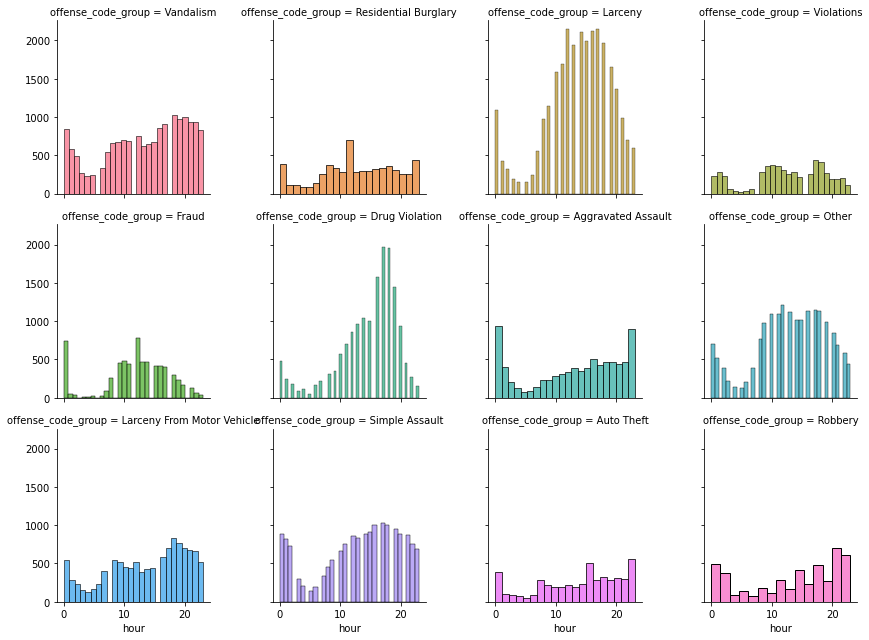

In [ ]:
top_12_crimes_list = ['Larceny', 'Other', 'Simple Assault', 'Vandalism', 'Drug Violation', 'Larceny From Motor Vehicle', 'Aggravated Assault', 'Fraud', 'Residential Burglary', 'Violations', 'Auto Theft', 'Robbery']
x = sns.FacetGrid(master_dataset[master_dataset.offense_code_group.isin(top_12_crimes_list)], col='offense_code_group', col_wrap=4, hue='offense_code_group')
x.map(sns.histplot, 'hour')

# Hourly Crime Distributions by Day of Week

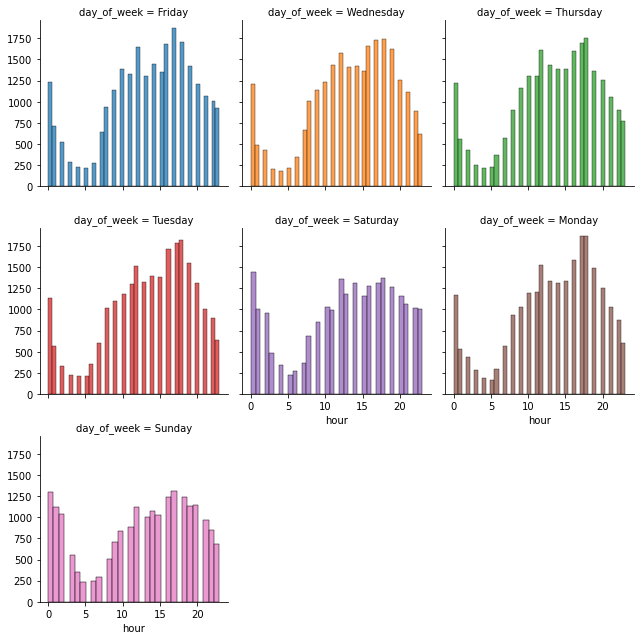

In [ ]:
x = sns.FacetGrid(master_dataset, col='day_of_week', col_wrap=3, hue='day_of_week')
x.map(sns.histplot, 'hour')

We found that Larceny and Drug violation have prevalence over other types of crimes and are the most frequent in the dataset. In the case of drug violations, around 6pm is when more frequently this crime occurred, but it is aso concerning that larceny is the most common practice in Boston.

# Highest-Incidence Crimes

Next, we'll take a look at the top-10 most frequent crimes in our data, starting with the most frequent.

In [ ]:
incidents_by_crime_type = master_dataset.groupby('offense_code_group').agg({'offense_code_group': 'count'}).rename({'offense_code_group': 'count'}, axis=1)
incidents_by_crime_type.sort_values('count', ascending=False, inplace=True)
incidents_by_crime_type.head(12)

,count
offense_code_group,
Larceny,28275
Other,17940
Simple Assault,16698
Vandalism,16479
Drug Violation,16099
Larceny From Motor Vehicle,11319
Aggravated Assault,8174
Fraud,6486
Residential Burglary,6073


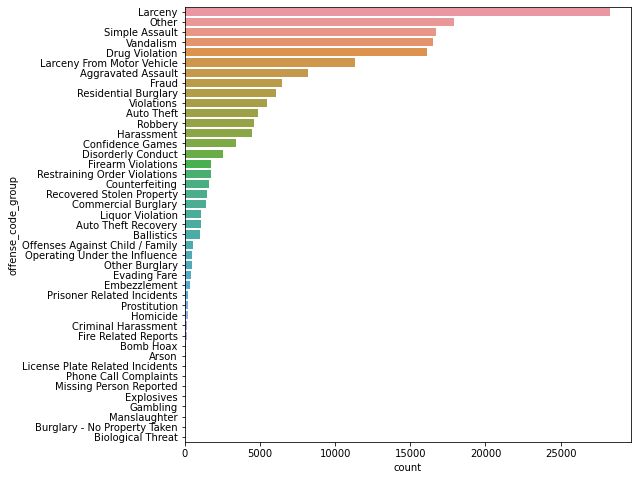

In [ ]:
plt.figure(figsize=(8, 8))
sns.barplot(y=incidents_by_crime_type.index, x='count', data=incidents_by_crime_type)

Insight: 

# Highest-Crime Neighborhoods

To get a more meaningful picture of crime incidence, we'll take a look at the crime per capita rates by neighborhood to normalize for the differing populations in each.

In [ ]:
crime_by_neighborhood = master_dataset.groupby('neighborhood').agg({'crime_per_capita': 'mean'}).sort_values('crime_per_capita', ascending=False)
crime_by_neighborhood

,crime_per_capita
neighborhood,
Downtown,0.974862
Back Bay,0.539345
Roxbury,0.465273
Dorchester,0.353937
West End,0.341508
Mattapan,0.312133
South End,0.286573
South Boston,0.273095
South Boston Waterfront,0.271061


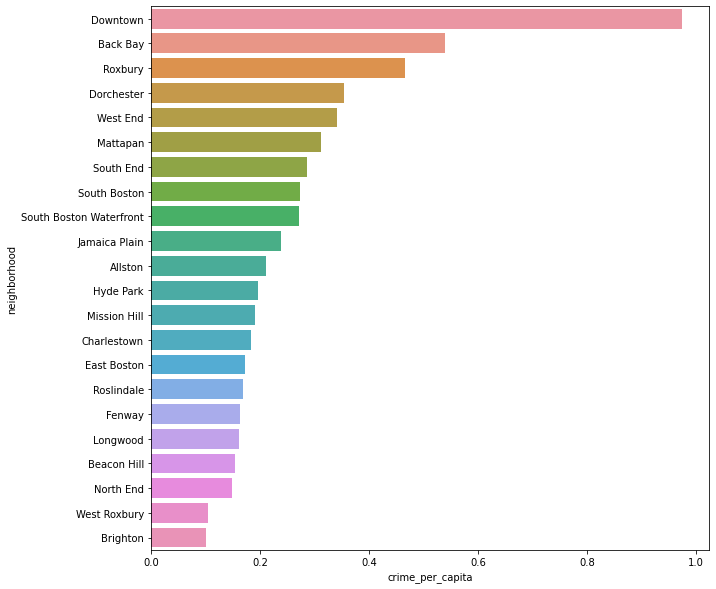

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(y=crime_by_neighborhood.index, x='crime_per_capita', data=crime_by_neighborhood)

Insight: Neighborhoods with the highest percentage of crimes per capita are: Downtown and Back Bay. Given BU is close to Downtown and Back Bay, students might want to be careful while residing in these areas. Other areas with low crime rate are Allston, Brighton, and Fenway, which are very close to BU and has the majority of student population. These would be the best places for BU students to look for houses.

# Explanatory Factors for Per-Capita Crime Rates

Are there relationships between neighborhood crime rates and some of our socioeconomic variables? We'll explore per capita income and proportion of college/university age residents here.

In [ ]:
income_by_neighborhood = master_dataset.groupby('neighborhood').agg({'per_capita_income': 'mean'}).sort_values('per_capita_income', ascending=False)
income_by_neighborhood

,per_capita_income
neighborhood,
South Boston Waterfront,129650.897100
Back Bay,110676.820600
Beacon Hill,100005.286100
North End,89696.388160
South End,83608.572040
Downtown,80057.341860
West End,77069.330710
Charlestown,75338.893920
South Boston,64744.789510


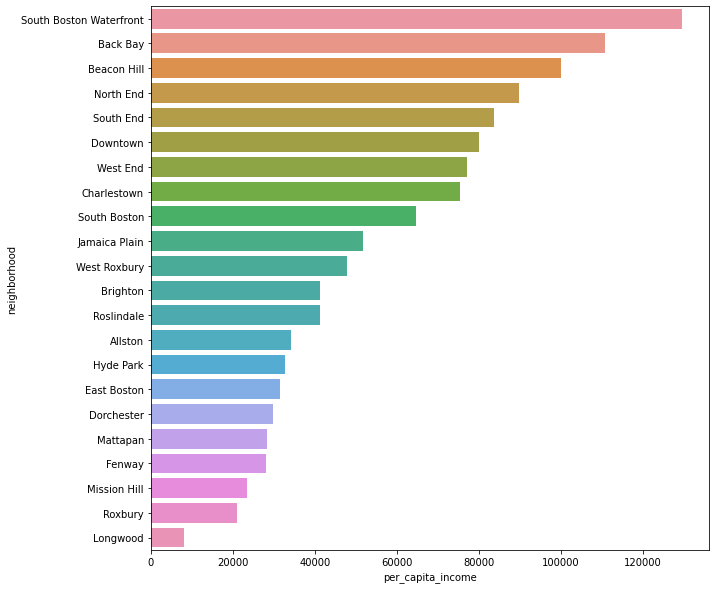

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(y=income_by_neighborhood.index, x='per_capita_income', data=income_by_neighborhood)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


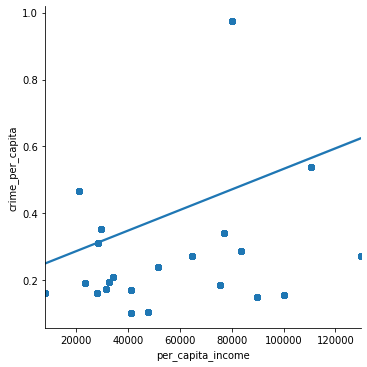

In [ ]:
sns.lmplot('per_capita_income', 'crime_per_capita', data=master_dataset)

In [ ]:
college_age_by_neighborhood = master_dataset.groupby('neighborhood').agg({'pct_20_34_years': 'mean'}).sort_values('pct_20_34_years', ascending=False)
college_age_by_neighborhood

,pct_20_34_years
neighborhood,
Allston,0.677327
North End,0.595268
Fenway,0.539640
Brighton,0.527714
Mission Hill,0.494593
Longwood,0.481218
Beacon Hill,0.468905
South Boston Waterfront,0.462866
South Boston,0.460595


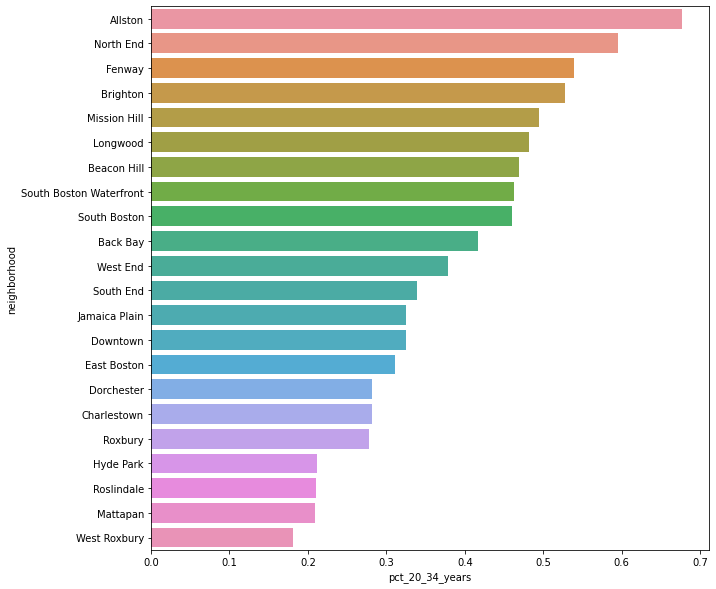

In [ ]:
plt.figure(figsize=(10, 10))
sns.barplot(y=college_age_by_neighborhood.index, x='pct_20_34_years', data=college_age_by_neighborhood)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


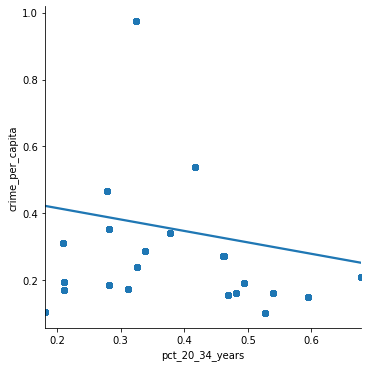

In [ ]:
sns.lmplot('pct_20_34_years', 'crime_per_capita', data=master_dataset)

# Crime Trends Over Time

Now, we'd like to explore whether there have been any trends in the frequencies of top 5 crimes during the time period covered in the data.

In [ ]:
top_5_crimes_list = ['Larceny', 'Other', 'Simple Assault', 'Vandalism', 'Drug Violation']
top_5_crimes_incidents = master_dataset[master_dataset['offense_code_group'].isin(top_5_crimes_list)]
top_5_crimes_timeseries = top_5_crimes_incidents.pivot_table(values='neighborhood', index='occurred_on_date', columns='offense_code_group', aggfunc='count')
top_5_crimes_timeseries.head()

offense_code_group,Drug Violation,Larceny,Other,Simple Assault,Vandalism
occurred_on_date,,,,,
2015-06-15,10.0,28.0,11.0,10.0,15.0
2015-06-16,26.0,23.0,15.0,13.0,13.0
2015-06-17,8.0,32.0,20.0,12.0,12.0
2015-06-18,8.0,25.0,16.0,13.0,13.0
2015-06-19,16.0,34.0,18.0,14.0,3.0


In [ ]:
top_5_crimes_rolling = top_5_crimes_timeseries.rolling(30, win_type='gaussian', center=True).mean(std=10)

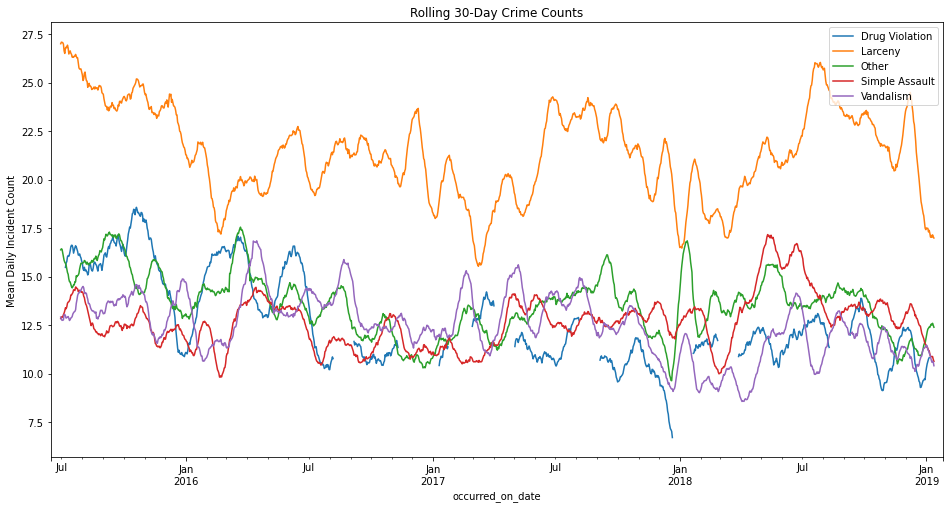

In [ ]:
top_5_crimes_rolling.plot(figsize=(16, 8), title='Rolling 30-Day Crime Counts')
plt.ylabel('Mean Daily Incident Count')
plt.legend(loc='upper right')

Good news! The most prevalent crimes in Boston generally seem to be trending downward across the board.

# Comparing Neighborhoods

Next, we'll want to look at how crime incidence counts for the top-10 crimes compare across 10 neighborhoods with the highest overall crime. We'll do this visually with the help of a heatmap.

In [ ]:
top_10_crimes_list = ['Larceny', 'Other', 'Simple Assault', 'Vandalism', 'Drug Violation', 'Larceny From Motor Vehicle', 'Aggravated Assault', 'Fraud', 'Residential Burglary', 'Violations']
top_10_crime_neighborhoods_list = ['Downtown', 'Back Bay', 'Roxbury', 'Dorchester', 'West End', 'Mattapan', 'South End', 'South Boston', 'South Boston Waterfront', 'Jamaica Plain']
top_10_crimes_v_neighborhoods = master_dataset[(master_dataset['offense_code_group'].isin(top_10_crimes_list)) & (master_dataset['neighborhood'].isin(top_10_crime_neighborhoods_list))]
top_10_pivot = top_10_crimes_v_neighborhoods.groupby(['offense_code_group', 'neighborhood']).agg({'total_crimes': 'sum', 'population': 'mean'}).reset_index()
top_10_pivot['crime_per_capita'] = top_10_pivot['total_crimes'] / top_10_pivot['population']
top_10_pivot = top_10_pivot.pivot_table(values='crime_per_capita', index='offense_code_group', columns='neighborhood', aggfunc='mean')
top_10_pivot

neighborhood,Back Bay,Dorchester,Downtown,Jamaica Plain,Mattapan,Roxbury,South Boston,South Boston Waterfront,South End,West End
offense_code_group,,,,,,,,,,
Aggravated Assault,104.633016,844.140824,719.448474,73.904223,150.760400,674.645192,99.133655,7.318643,88.551060,35.516873
Drug Violation,83.598544,1355.580443,1775.224487,238.162320,104.252533,1335.797479,331.810993,3.523791,284.567000,29.711230
Fraud,160.724943,471.090749,592.716358,71.281815,96.761333,333.135143,66.362199,6.776521,89.697352,37.565923
Larceny,2293.836181,1548.830292,4066.151201,274.876030,219.117600,1103.161206,287.842623,45.267161,452.212211,140.359948
Larceny From Motor Vehicle,437.409157,780.078145,764.292146,202.640612,111.431600,603.923765,214.379942,12.197738,194.869647,31.077264
Other,265.357959,1668.815088,1513.961356,212.653443,272.492400,1328.353118,233.769720,14.637285,263.360597,60.788493
Residential Burglary,80.901817,531.260116,69.215233,116.101151,82.715333,301.031337,78.105304,2.168487,77.088140,5.805643
Simple Assault,313.359704,1498.571173,1783.998249,159.728483,249.394533,1062.682495,206.460174,30.358814,241.007902,116.795869
Vandalism,270.751414,1654.657590,771.116183,183.806955,268.434667,967.301623,270.910704,14.908346,200.027962,37.224415


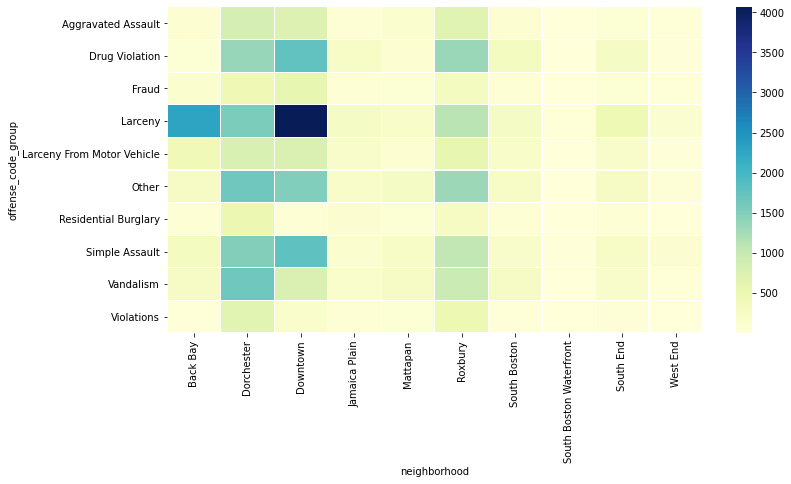

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(top_10_pivot, xticklabels=top_10_pivot.columns, yticklabels=top_10_pivot.index, linewidths=.2, cmap="YlGnBu")

It seems like Dorchester, Back Bay, Downtown, and Roxbury are the only neighborhoods that stand out clearly. Back Bay and Downtown have particularly high larceny rates, while Dorchester and Roxbury have moderate-to-high crime incidence in at least 5 of the 10 most prevalent crime categories.

#Modeling

Many of our independent variables are expressed are proportions of the population belonging to a particular cohort, which means they are bound between 0 and 1. However, others such as per capita income are not. Before training any models, we want to normalize these continuous variables to have similar ranges to the rest of our feature data.

In [ ]:
master_dataset_normalized = master_dataset.drop(['total_crimes', 'murder', 'aggravated_assault', 'robbery', 'arson', 'auto_theft', 'larceny', 'burglary', 'violent_crimes', 'property_crimes'], axis=1, inplace=True)

variables_to_normalize = master_dataset[['lat', 'long', 'population', 'median_age', 'per_capita_income', 'median_household_income', 'median_family_income']]

from sklearn.preprocessing import normalize

variables_normalized = normalize(variables_to_normalize)
variables_normalized = pd.DataFrame(variables_normalized, columns=variables_to_normalize.columns)
variables_normalized.head()

,lat,long,population,median_age,per_capita_income,median_household_income,median_family_income
0,0.000295,-0.000496,0.796768,0.000233,0.207595,0.383631,0.418200
1,0.000413,-0.000694,0.217570,0.000268,0.332993,0.566949,0.721351
2,0.000295,-0.000496,0.796768,0.000233,0.207595,0.383631,0.418200
3,0.000576,-0.000967,0.668260,0.000442,0.285446,0.415484,0.547102
4,0.000576,-0.000967,0.668260,0.000442,0.285446,0.415484,0.547102


In [ ]:
master_dataset.head()

,offense_code_group,shooting,occurred_on_date,year,month,day_of_week,hour,lat,long,neighborhood,population,median_age,pct_0_9_years,pct_10_17_years,pct_18_19_years,pct_20_34_years,pct_35_39_years,pct_60_plus_years,per_capita_income,median_household_income,median_family_income,total_labor_force_participation,labor_force_part_age_16_19,labor_force_part_age_20_34,labor_force_part_age_35_64,labor_force_part_age_65_plus,total_poverty_rate,poverty_rate_age_0_4,poverty_rate_age_5_17,poverty_rate_age_18_24,poverty_rate_age_25_34,poverty_rate_age_35_64,poverty_rate_age_65_plus,pct_less_than_high_school,pct_high_school_graduate,pct_ged,pct_some_college,pct_associates_degree,pct_bachelors_degree,pct_masters_degree_and_higher,...,pct_female_no_spouse,pct_householder_alone,pct_householder_not_alone,pct_total_units_occupied,pct_owner_occupied,pct_renter_occupied,pct_studio_1_bed,pct_2_bed,pct_3_bed,pct_4_plus_bed,pct_pop_in_group_quarters,pct_no_vehicle,pct_1_vehicle,pct_2_vehicles,pct_3_plus_vehicles,pct_not_moved,pct_moved_within_county,pct_moved_from_diff_county,pct_moved_from_diff_state,pct_moved_from_abroad,pct_native_citizens,pct_naturalized_citizens,pct_non_citizens,pct_vacant_units,pct_vacant_for_rent,pct_vacant_rented_unoccupied,pct_vacant_for_sale,pct_vacant_sold_unoccupied,pct_vacant_seasonal,pct_vacant_other,crime_per_capita,murder_per_capita,aggravated_assault_per_capita,robbery_per_capita,arson_per_capita,auto_theft_per_capita,larceny_per_capita,burglary_per_capita,violent_crimes_per_capita,property_crimes_per_capita
0,Vandalism,0,2019-01-25,2019,1,Friday,22,0.000295,-0.000496,Dorchester,0.796768,0.000233,0.119014,0.102577,0.027405,0.281863,0.306440,0.162699,0.207595,0.383631,0.418200,0.690253,0.396351,0.840849,0.782643,0.187358,0.222179,0.327769,0.353337,0.285714,0.155982,0.175968,0.193433,0.179614,0.257139,0.041622,0.171092,0.057445,0.187125,0.105962,...,0.270107,0.290219,0.106792,0.906544,0.361279,0.638721,0.146210,0.337174,0.348285,0.168331,0.011165,0.296743,0.421277,0.216316,0.065664,0.858707,0.089072,0.027718,0.013259,0.011244,0.665989,0.191720,0.142291,0.093456,0.162032,0.119334,0.038099,0.466608,0.034158,0.179768,0.353937,0.000797,0.020989,0.011046,0.000219,0.012473,0.057637,0.016490,0.032832,0.086819
1,Residential Burglary,0,2019-01-25,2019,1,Friday,12,0.000413,-0.000694,Allston,0.217570,0.000268,0.021235,0.017185,0.122475,0.677327,0.119776,0.042002,0.332993,0.566949,0.721351,0.610700,0.453921,0.617661,0.797246,0.231076,0.279264,0.576642,0.024306,0.572377,0.209288,0.067823,0.266932,0.054735,0.067197,0.006902,0.084931,0.034317,0.415836,0.336081,...,0.050107,0.372510,0.382777,0.925411,0.121974,0.878026,0.449376,0.311543,0.164492,0.074589,0.277244,0.509807,0.318878,0.130861,0.040454,0.612006,0.108524,0.065229,0.138410,0.075832,0.637454,0.097243,0.265303,0.074589,0.427757,0.338403,0.000000,0.038023,0.076046,0.119772,0.210515,0.000000,0.008471,0.004661,0.000179,0.006499,0.055441,0.020662,0.013132,0.082781
2,Larceny,0,2019-01-09,2019,1,Wednesday,11,0.000295,-0.000496,Dorchester,0.796768,0.000233,0.119014,0.102577,0.027405,0.281863,0.306440,0.162699,0.207595,0.383631,0.418200,0.690253,0.396351,0.840849,0.782643,0.187358,0.222179,0.327769,0.353337,0.285714,0.155982,0.175968,0.193433,0.179614,0.257139,0.041622,0.171092,0.057445,0.187125,0.105962,...,0.270107,0.290219,0.106792,0.906544,0.361279,0.638721,0.146210,0.337174,0.348285,0.168331,0.011165,0.296743,0.421277,0.216316,0.065664,0.858707,0.089072,0.027718,0.013259,0.011244,0.665989,0.191720,0.142291,0.093456,0.162032,0.119334,0.038099,0.466608,0.034158,0.179768,0.353937,0.000797,0.020989,0.011046,0.000219,0.012473,0.057637,0.016490,0.032832,0.086819
3,Larceny,0,2019-01-25,2019,1,Friday,17,0.000576,-0.000967,Roxbury,0.668260,0.000442,0.121065,0.097653,0.049279,0.278041,0.287365,0.166596,0.285446,0.415484,0.547102,0.615406,0.485424,0.731257,0.702157,0.171215,0.316872,0.435413,0.441737,0.331461,0.213928,0.255699,0.386986,0.230231,0.244939,0.049869,0.189443,0.056866,0.150292,0.

In [ ]:
master_dataset[['lat', 'long', 'population', 'median_age', 'per_capita_income', 'median_household_income', 'median_family_income']] = variables_normalized[['lat', 'long', 'population', 'median_age', 'per_capita_income', 'median_household_income', 'median_family_income']]
master_dataset.head()

,offense_code_group,shooting,occurred_on_date,year,month,day_of_week,hour,lat,long,neighborhood,population,median_age,pct_0_9_years,pct_10_17_years,pct_18_19_years,pct_20_34_years,pct_35_39_years,pct_60_plus_years,per_capita_income,median_household_income,median_family_income,total_labor_force_participation,labor_force_part_age_16_19,labor_force_part_age_20_34,labor_force_part_age_35_64,labor_force_part_age_65_plus,total_poverty_rate,poverty_rate_age_0_4,poverty_rate_age_5_17,poverty_rate_age_18_24,poverty_rate_age_25_34,poverty_rate_age_35_64,poverty_rate_age_65_plus,pct_less_than_high_school,pct_high_school_graduate,pct_ged,pct_some_college,pct_associates_degree,pct_bachelors_degree,pct_masters_degree_and_higher,...,pct_female_no_spouse,pct_householder_alone,pct_householder_not_alone,pct_total_units_occupied,pct_owner_occupied,pct_renter_occupied,pct_studio_1_bed,pct_2_bed,pct_3_bed,pct_4_plus_bed,pct_pop_in_group_quarters,pct_no_vehicle,pct_1_vehicle,pct_2_vehicles,pct_3_plus_vehicles,pct_not_moved,pct_moved_within_county,pct_moved_from_diff_county,pct_moved_from_diff_state,pct_moved_from_abroad,pct_native_citizens,pct_naturalized_citizens,pct_non_citizens,pct_vacant_units,pct_vacant_for_rent,pct_vacant_rented_unoccupied,pct_vacant_for_sale,pct_vacant_sold_unoccupied,pct_vacant_seasonal,pct_vacant_other,crime_per_capita,murder_per_capita,aggravated_assault_per_capita,robbery_per_capita,arson_per_capita,auto_theft_per_capita,larceny_per_capita,burglary_per_capita,violent_crimes_per_capita,property_crimes_per_capita
0,Vandalism,0,2019-01-25,2019,1,Friday,22,0.000295,-0.000496,Dorchester,0.796768,0.000233,0.119014,0.102577,0.027405,0.281863,0.306440,0.162699,0.207595,0.383631,0.418200,0.690253,0.396351,0.840849,0.782643,0.187358,0.222179,0.327769,0.353337,0.285714,0.155982,0.175968,0.193433,0.179614,0.257139,0.041622,0.171092,0.057445,0.187125,0.105962,...,0.270107,0.290219,0.106792,0.906544,0.361279,0.638721,0.146210,0.337174,0.348285,0.168331,0.011165,0.296743,0.421277,0.216316,0.065664,0.858707,0.089072,0.027718,0.013259,0.011244,0.665989,0.191720,0.142291,0.093456,0.162032,0.119334,0.038099,0.466608,0.034158,0.179768,0.353937,0.000797,0.020989,0.011046,0.000219,0.012473,0.057637,0.016490,0.032832,0.086819
1,Residential Burglary,0,2019-01-25,2019,1,Friday,12,0.000413,-0.000694,Allston,0.217570,0.000268,0.021235,0.017185,0.122475,0.677327,0.119776,0.042002,0.332993,0.566949,0.721351,0.610700,0.453921,0.617661,0.797246,0.231076,0.279264,0.576642,0.024306,0.572377,0.209288,0.067823,0.266932,0.054735,0.067197,0.006902,0.084931,0.034317,0.415836,0.336081,...,0.050107,0.372510,0.382777,0.925411,0.121974,0.878026,0.449376,0.311543,0.164492,0.074589,0.277244,0.509807,0.318878,0.130861,0.040454,0.612006,0.108524,0.065229,0.138410,0.075832,0.637454,0.097243,0.265303,0.074589,0.427757,0.338403,0.000000,0.038023,0.076046,0.119772,0.210515,0.000000,0.008471,0.004661,0.000179,0.006499,0.055441,0.020662,0.013132,0.082781
2,Larceny,0,2019-01-09,2019,1,Wednesday,11,0.000295,-0.000496,Dorchester,0.796768,0.000233,0.119014,0.102577,0.027405,0.281863,0.306440,0.162699,0.207595,0.383631,0.418200,0.690253,0.396351,0.840849,0.782643,0.187358,0.222179,0.327769,0.353337,0.285714,0.155982,0.175968,0.193433,0.179614,0.257139,0.041622,0.171092,0.057445,0.187125,0.105962,...,0.270107,0.290219,0.106792,0.906544,0.361279,0.638721,0.146210,0.337174,0.348285,0.168331,0.011165,0.296743,0.421277,0.216316,0.065664,0.858707,0.089072,0.027718,0.013259,0.011244,0.665989,0.191720,0.142291,0.093456,0.162032,0.119334,0.038099,0.466608,0.034158,0.179768,0.353937,0.000797,0.020989,0.011046,0.000219,0.012473,0.057637,0.016490,0.032832,0.086819
3,Larceny,0,2019-01-25,2019,1,Friday,17,0.000576,-0.000967,Roxbury,0.668260,0.000442,0.121065,0.097653,0.049279,0.278041,0.287365,0.166596,0.285446,0.415484,0.547102,0.615406,0.485424,0.731257,0.702157,0.171215,0.316872,0.435413,0.441737,0.331461,0.213928,0.255699,0.386986,0.230231,0.244939,0.049869,0.189443,0.056866,0.150292,0.

## Predicting Shooting vs. Non-Shooting Crimes

We have several options for predicting categorical outcome variables based on the explanatory features of our dataset. Some of these could be training a classifier to predict the neigborhood a crime occurred in based on the crimes characteristics, or to predict the day of week or time of day a crime is likely to occur in. However, each of these outcome variables has a relatively large number of distinct classes (7-22), making these models resource-intensive and complex to develop. Instead, we'll focus on predicting a binary outcome that may be particularly important in riskier neighborhood - whether or not a given crime will involve a shooting.

In [ ]:
X = master_dataset.drop(['shooting', 'occurred_on_date', 'year'], axis=1)
X = pd.get_dummies(X, columns=['offense_code_group', 'month', 'day_of_week', 'hour', 'neighborhood'], drop_first=True)

In [ ]:
y = master_dataset.shooting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=833)

In [ ]:
from sklearn.naive_bayes import GaussianNB

shooting_model_nb = GaussianNB()
shooting_model_nb.fit(X_train, y_train)
y_shooting_model_nb = shooting_model_nb.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_shooting_model_nb)

0.756094551190259

In [ ]:
from sklearn.linear_model import LogisticRegression

shooting_model_logit_ridge = LogisticRegression(solver='saga', penalty='l2')
shooting_model_logit_ridge.fit(X_train, y_train)
y_shooting_model_logit_ridge = shooting_model_logit_ridge.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [ ]:
roc_auc_score(y_test, y_shooting_model_logit_ridge)

0.5887954959946052

In [ ]:
shooting_model_logit_lasso = LogisticRegression(solver='saga', penalty='l1')
shooting_model_logit_lasso.fit(X_train, y_train)
y_shooting_model_logit_lasso = shooting_model_logit_lasso.predict(X_test)
roc_auc_score(y_test, y_shooting_model_logit_lasso)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.5887855083792483

In [ ]:
shooting_model_logit_elastic = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5)
shooting_model_logit_elastic.fit(X_train, y_train)
y_shooting_model_logit_elastic = shooting_model_logit_elastic.predict(X_test)
roc_auc_score(y_test, y_shooting_model_logit_elastic)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.5887855083792483

In [ ]:
from sklearn.tree import DecisionTreeClassifier

shooting_model_tree = DecisionTreeClassifier()
shooting_model_tree.fit(X_train, y_train)
y_shooting_model_tree = shooting_model_tree.predict(X_test)
roc_auc_score(y_test, y_shooting_model_tree)

0.7046852264637633

In [ ]:
from sklearn.ensemble import RandomForestClassifier

shooting_model_forest = RandomForestClassifier()
shooting_model_forest.fit(X_train, y_train)
y_shooting_model_forest = shooting_model_forest.predict(X_test)
roc_auc_score(y_test, y_shooting_model_forest)

0.6277723454242041

In [ ]:
from sklearn.svm import SVC

shooting_model_svc = SVC()
shooting_model_svc.fit(X_train, y_train)
y_shooting_model_svc = shooting_model_svc.predict(X_test)
roc_auc_score(y_test, y_shooting_model_svc)

0.5947796419187195

Insight: ultimately, the Naive Bayesian classifier performed significantly better in terms of AUC than several versions of logistic regression, a decision tree, ensemble methods (Random Forest), and a Support Vector Classifier. In terms of simple accuracy score though, it would not do better than chance (due to the extremely low incidence of shootings).

# Conclusions

*   Downtown and Back Bay are convenient neighborhoods for BU students, but for those moving to Boston for the first time, it may be better to avoid them before gaining a better understanding of the city. 
*   Allston, Brighton, and Fenway are relatively low-crime neighborhoods that are also close to BU and may be better options for new students.
*   Somewhat counterintuitively, there is a positive relationships between crime rate and per capita income.
*   There is an inverse relationship between per capita crime rates and the percentage of a neighborhood's population that is college/university age, making neighborhoods popular among students potentially safer.
*   Dorchester and Roxbury are popular student neighborhoods, but may have higher larceny rates than some students may be comfortable with.
*   A relatively simple Naive Bayesian Classifier was able to do a reasonably good job of predicting whether a given crime involved a shooting or not.

Here's the dashboard we prepared: https://datastudio.google.com/u/0/reporting/7775608d-646e-428a-8b3b-ebf31887bf49/page/rSvFC?s=l5p06WjvRa0 





